<a href="https://colab.research.google.com/github/Anirudh11011/Backup/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1. Linear Regreesion Model***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, batch_size=32, regularization=0, max_epochs=100, patience=3):
        """Linear Regression using Gradient Descent.

        Parameters:
        -----------
        batch_size: int
            The number of samples per batch.
        regularization: float
            The regularization parameter.
        max_epochs: int
            The maximum number of epochs.
        patience: int
            The number of epochs to wait before stopping if the validation loss
            does not improve.
        """
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y, batch_size=32, regularization=0, max_epochs=100, patience=3):
        """Fit a linear model using gradient descent with early stopping.

        Parameters:
        -----------
        X: np.ndarray
            Input data (features).
        y: np.ndarray
            Target values.
        batch_size: int
            The number of samples per batch.
        regularization: float
            The regularization parameter.
        max_epochs: int
            The maximum number of epochs.
        patience: int
            The number of epochs to wait before stopping if the validation loss
            does not improve.
        """
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.loss_history = []

        # Initialize weights and bias

        if len(X.shape) >1:
            n_features=X.shape[1]
        else:
            n_features=1
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Split data into training and validation sets
        m = len(X)

        val_size = int(0.1 * m)
        train_X, val_X = X[:-val_size], X[-val_size:]
        train_y, val_y = y[:-val_size], y[-val_size:]

        best_weights = self.weights.copy()
        best_bias = self.bias
        best_val_loss = float('inf')
        patience_counter = 0

        def compute_loss(X, y):
            predictions = np.dot(X, self.weights) + self.bias
            loss = np.mean((predictions - y) ** 2) + (self.regularization * np.sum(self.weights ** 2))
            return loss

        step = 0

        for epoch in range(max_epochs):
            # Shuffle training data
            indices = np.arange(len(train_X))
            np.random.shuffle(indices)
            train_X, train_y = train_X[indices], train_y[indices]

            # Mini-batch gradient descent
            for start in range(0, len(train_X), batch_size):
                end = start + batch_size
                X_batch = train_X[start:end]
                y_batch = train_y[start:end]

                # Predictions and gradients
                predictions = np.dot(X_batch, self.weights) + self.bias
                errors = predictions - y_batch

                grad_w = (2 / len(X_batch)) * (np.dot(X_batch.T, errors) + regularization * self.weights)
                grad_b = (2 / len(X_batch)) * np.sum(errors)

                # Update weights and bias
                self.weights -= 0.001 * grad_w  # learning rate = 0.001
                self.bias -= 0.001 * grad_b

                loss = compute_loss(train_X, train_y)
                self.loss_history.append(loss)
                step +=1
            # Compute validation loss
            val_loss = compute_loss(val_X, val_y)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_weights = self.weights.copy()
                best_bias = self.bias
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        # Restore the best weights and bias
        self.weights = best_weights
        self.bias = best_bias

        self.plot_loss()



    def predict(self, X):
        """Predict using the linear model.

        Parameters
        ----------
        X: numpy.ndarray
            The input data.

        Returns
        -------
        numpy.ndarray
            The predicted values.
        """
        return np.dot(X, self.weights) + self.bias


    def score(self, X, y):
        """Evaluate the linear model using the mean squared error.

        Parameters
        ----------
        X: numpy.ndarray
            The input data.
        y: numpy.ndarray
            The target data.
        """
        # TODO: Implement the scoring function.
        predected_y=self.predict(X)
        mse=np.mean((predected_y-y)**2)
        return mse



    def save(self, file_path):
        """Save model parameters to a file."""
        model_params = {
            'weights': self.weights.tolist(),
            'bias': self.bias,
            'batch_size': self.batch_size,
            'regularization': self.regularization,
            'max_epochs': self.max_epochs,
            'patience': self.patience
        }
        with open(file_path, 'w') as file:
            json.dump(model_params, file)
        print(f"Model parameters saved to {file_path}")

    def load(self, file_path):
        """Load model parameters from a file."""
        with open(file_path, 'r') as file:
            model_params = json.load(file)
        self.weights = np.array(model_params['weights'])
        self.bias = model_params['bias']
        self.batch_size = model_params['batch_size']
        self.regularization = model_params['regularization']
        self.max_epochs = model_params['max_epochs']
        self.patience = model_params['patience']
        print(f"Model parameters loaded from {file_path}")


    def plot_loss(self):

          plt.figure(figsize=(8, 5))
          plt.plot(self.loss_history, label="Training Loss", color='blue')
          plt.xlabel("Step Number")
          plt.ylabel("Loss")
          plt.title("Loss Curve")
          plt.legend()
          plt.grid(True)
          plt.savefig("loss_curve.png")  # Save the plot
          print("Loss curve saved as 'loss_curve.png'")
          plt.show()

# ***1.5 Regression with a single output***

# ***1.5.1 Preparing the Data***

In [ ]:
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X = data.data

#  ***1.5.2 Training***

# ***Model 1***

Early stopping at epoch 91
Loss curve saved as 'loss_curve.png'


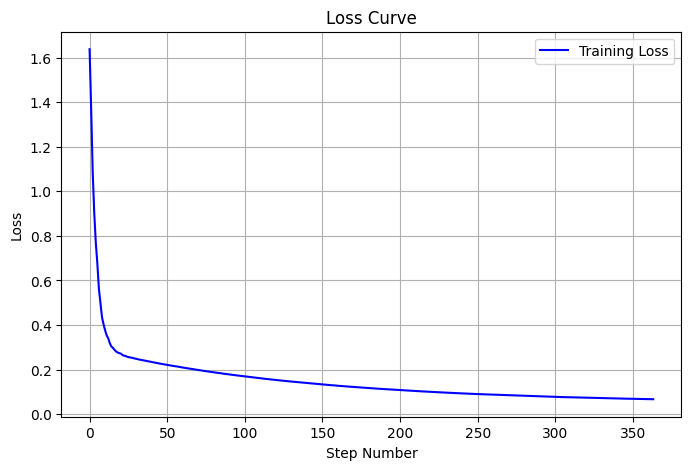

Model parameters saved to model1.json


In [ ]:
y1 = X[:, 3]

X_model1 = X[:, :3]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_model1, y1, test_size=0.1, stratify=data.target)

model1 = LinearRegression()
model1.fit(X_train1, y_train1)
model1.save("model1.json")

# ***Model 2***

Loss curve saved as 'loss_curve.png'


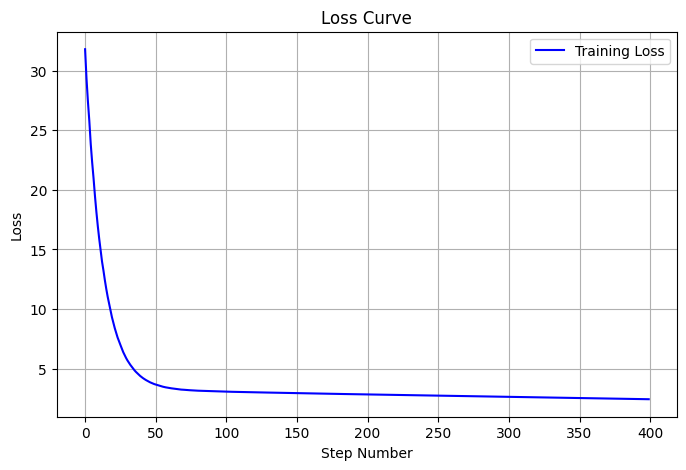

Model parameters saved to model2.json


In [ ]:
y2 = X[:, 0]

X_model2 = X[:, 2:4]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_model2, y2, test_size=0.1, stratify=data.target)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)
model2.save("model2.json")

# ***Model 3***

Loss curve saved as 'loss_curve.png'


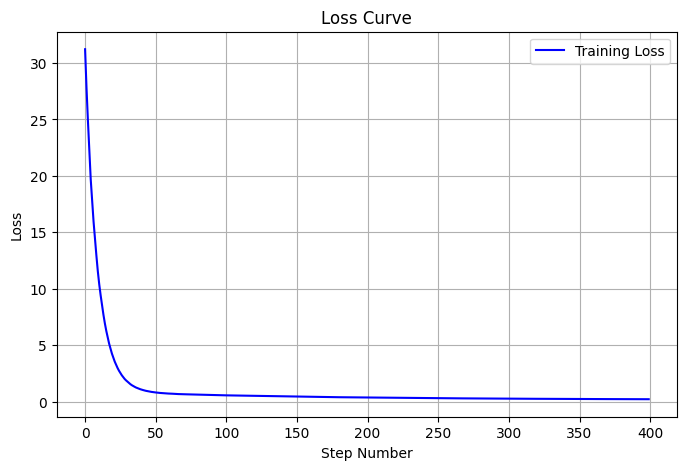

Model parameters saved to model3.json


In [ ]:
y3 = X[:, 0]

X_model3 = X[:, 1:4]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_model3, y3, test_size=0.1, stratify=data.target)

model3 = LinearRegression()
# use predict
model3.fit(X_train3, y_train3)
model3.save("model3.json")

# ***Model 4***

Early stopping at epoch 54
Loss curve saved as 'loss_curve.png'


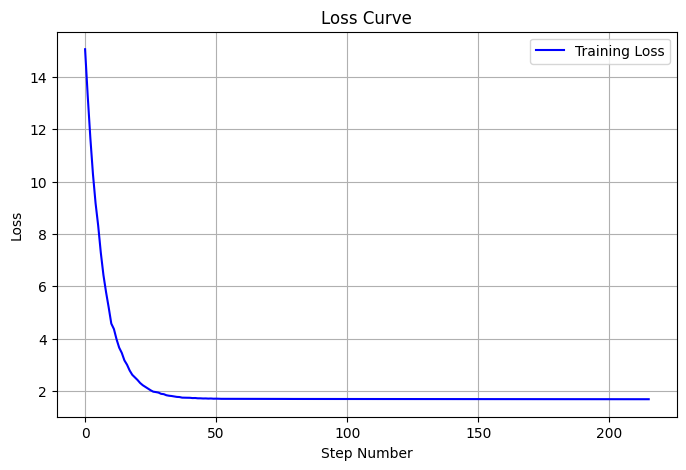

Model parameters saved to model4.json


In [ ]:
y4 = X[:, 2]

X_model4 = X[:, 0].reshape(-1, 1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_model4, y4, test_size=0.1, stratify=data.target)

model4 = LinearRegression()
model4.fit(X_train4, y_train4)

model4.save("model4.json")

# ***1.5.3 Model with L2 Regularization***

Early stopping at epoch 46
Loss curve saved as 'loss_curve.png'


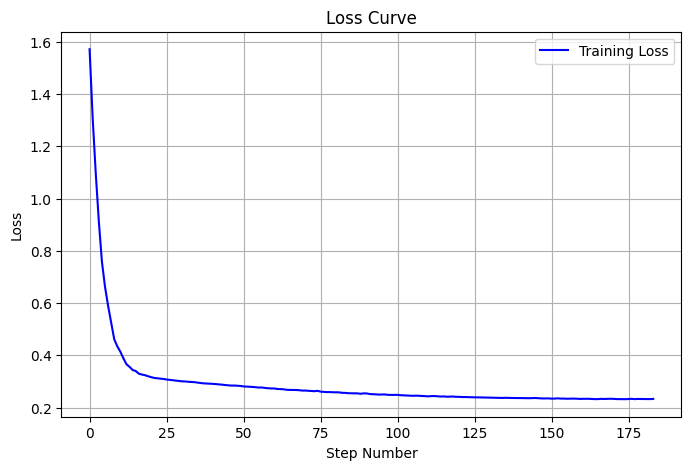

Model parameters saved to model1_L2.json


In [ ]:
y1 = X[:, 3]

X_model1 = X[:, :3]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_model1, y1, test_size=0.1, stratify=data.target)

model1 = LinearRegression()
model1.fit(X_train1, y_train1,regularization=2)
model1.save("model1_L2.json")



# ***1.5.4 Testing***

## ***eval_regression1***

In [ ]:
model = LinearRegression()
model.load("model1.json")
mse = model.score(X_test1, y_test1)
print(f"Mean Squared Error is : {mse}")



Model parameters loaded from model1.json
Mean Squared Error is : 0.10881781375744218


## ***eval_regression2***

In [ ]:
model = LinearRegression()
model.load("model2.json")
mse = model.score(X_test2, y_test2)
print(f"Mean Squared Error is: {mse}")


Model parameters loaded from model2.json
Mean Squared Error is: 2.154908458439952


***eval_regression3***

In [ ]:
model = LinearRegression()
model.load("model3.json")
mse = model.score(X_test3, y_test3)
print(f"Mean Squared Error is: {mse}")

Model parameters loaded from model3.json
Mean Squared Error is: 0.22785582839573618


***eval_regression4***

In [ ]:
model = LinearRegression()
model.load("model4.json")
mse = model.score(X_test4, y_test4)
print(f"Mean Squared Error is: {mse}")

Model parameters loaded from model4.json
Mean Squared Error is: 1.6380308794589697


***eval_regression4_L2***

In [ ]:
model = LinearRegression()
model.load("model1_L2.json")
mse = model.score(X_test1, y_test1)
print(f"Mean Squared Error is : {mse}")

Model parameters loaded from model1_L2.json
Mean Squared Error is : 0.18569157702020592
